## Aluna: Manuela Diniz Cavalcanti

### Colab (1.2)

### Dataset: [Iris scikit-learn](https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/datasets/data/iris.csv)

### Conclusão no final do colab

## **Otimização de parâmetros de um modelo**



*   Aqui vamos considerar o problema de **otimizar os parâmetros um modelo K-means**, que são os centróides de um conjunto de clusters.
* O objetivo é **encontrar um conjunto de centróides** que particione um conjunto de dados $X$ (com $N$ amostras e $n_f$ características) em $k$ grupos. Os elementos precisam ser divididos de uma forma em que cada grupo $G_k$, definido por um centróide $c_k=(c_{k1},c_{k2},...,c_{kn_f})$, tenha elementos mais parecidos entre si, enquanto os elementos de grupos diferentes devem ser mais diferentes entre si.
*   A biblioteca sklearn fornece o algoritmo de Lloyd ou Elkan para otimizar os parâmetros do K-means. Na prática, o algoritmo k-means é muito rápido (um dos algoritmos de agrupamento mais rápidos disponíveis), mas ele pode cair em mínimos locais. Algoritmos evolucionários podem realizar uma busca aleatória dos centróides para fugir dos ótimos locais em busca da solução ótima global.






## **1. Resolvendo com GA**

**"GA" (Genetic Algorithm).**

Algoritmos de otimização e busca inspirados no processo de evolução biológica. Os algoritmos genéticos simulam processos de seleção natural, recombinação genética (crossover), e mutação para encontrar soluções aproximadas ou ótimas para problemas de otimização, busca e aprendizado.

Seus principais componentes são:

1. **Indivíduo:** cada indivíduo é uma solução candidata ao problema.
2.   **População:** representa um conjunto de indivíduos.
3.   **Cromossomo:** representação de um indivíduo (cadeia de bits, números reais ou qualquer outra representação que seja adequada para o problema).
3. **Aptidão (Fitness):** medida de quão bem um indivíduo se ajusta ao objetivo do problema. Geralmente, é uma função que atribui um valor numérico à qualidade da solução.
4. **Seleção:** escolher os melhores indivíduos da população para reprodução (aqueles com mais probabilidade de terem maior aptidão).
5. **Crossover (Recombinação):** processo de troca de informações genéticas entre dois indivíduos, simulando a recombinação genética na reprodução biológica.
6. **Mutação:** modificação aleatória de um ou mais genes em um cromossomo, simulando as mudanças genéticas espontâneas.
7. **Elitismo:** pode ser usado para preservar os melhores indivíduos de uma geração para a próxima, sem alterações.

Imports

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn import datasets, linear_model
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
# Load MNIST training dataset
#df = pd.read_csv("/content/drive/MyDrive/OPTIMIZATION_EVOLUTIONARY_COMPUTING/Parte_2/Iris.csv")  # Manu
df = pd.read_csv("/content/drive/MyDrive/Classroom/OTIMIZAÇÃO E COMPUTAÇÃO EVOLUCIONÁRIA Prof. Adiel Filho - Pós-Graduação em Ciência de Dados/Iris.csv")  # Fábio

# Exibe as primeiras linhas do DataFrame
display(df.head())


Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

### **Dataset: Iris**

O conjunto de dados Iris consiste em **150 amostras de flores Iris**, cada uma pertencente a uma de três espécies: Iris setosa, Iris versicolor e Iris virginica.

Cada amostra é descrita por quatro características (atributos):

* **Comprimento da Sépala (sepal length)**: Comprimento da parte mais externa da flor.
* **Largura da Sépala (sepal width)**: Largura da parte mais externa da flor.
* **Comprimento da Pétala (petal length)**: Comprimento da parte mais interna da flor.
* **Largura da Pétala (petal width)**: Largura da parte mais interna da flor.


**Cada espécie de flor Iris é representada por 50 amostras no conjunto de dados**. O objetivo comum é usar as características para classificar corretamente as flores nas três espécies.

In [4]:
df['Species'].unique()
# 3 caterogias

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
# Dicionário de classes:
classes = {
          'Iris-setosa':      0,
          'Iris-versicolor':  1,
          'Iris-virginica':   2
          }

# Substituir os valores na coluna 'Species' pelos valores das classes numéricas constantes no dicionário "classes"
df['Class'] = df['Species'].replace(classes)

In [6]:
remove_columns = ['Id', 'Species']
df2 = df.drop(columns=remove_columns)
df2.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Class
0            5.1           3.5            1.4           0.2      0
1            4.9           3.0            1.4           0.2      0
2            4.7           3.2            1.3           0.2      0
3            4.6           3.1            1.5           0.2      0
4            5.0           3.6            1.4           0.2      0

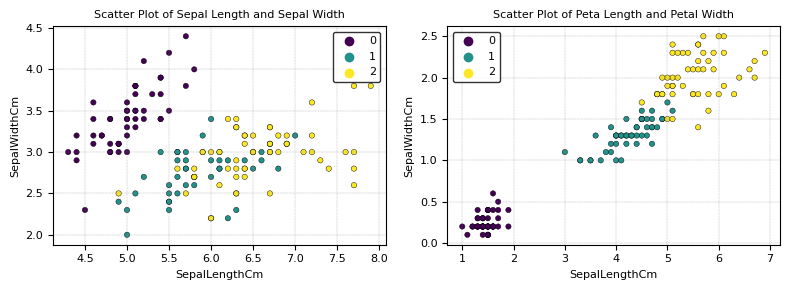

In [7]:
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes = axes.flatten() # Reshape dos eixos em uma lista unidimensional para facilitar o acesso
sns.scatterplot(data=df2, ax= axes[0], x=columns[0], y=columns[1], hue='Class', palette='viridis', edgecolor='k', s=15, linewidths=0.5)
axes[0].set_title('Scatter Plot of Sepal Length and Sepal Width', fontsize = 8)
axes[0].tick_params(axis='x', labelsize =8)
axes[0].tick_params(axis='y', labelsize =8)
axes[0].set_xlabel(columns[0], fontsize = 8)
axes[0].set_ylabel(columns[1], fontsize = 8)
axes[0].grid(color='gray', linestyle='--', linewidth=0.2)
axes[0].legend(fontsize = 8, edgecolor = 'k')
sns.scatterplot(data=df2, ax= axes[1], x=columns[2], y=columns[3], hue='Class', palette='viridis', edgecolor='k', s=15, linewidths=0.5)
axes[1].set_title('Scatter Plot of Peta Length and Petal Width', fontsize = 8)
axes[1].tick_params(axis='x', labelsize =8)
axes[1].tick_params(axis='y', labelsize =8)
axes[1].set_xlabel(columns[0], fontsize = 8)
axes[1].set_ylabel(columns[1], fontsize = 8)
axes[1].grid(color='gray', linestyle='--', linewidth=0.2)
axes[1].legend(fontsize = 8, edgecolor = 'k')
plt.tight_layout()  # Ajuste a posição dos subplots e espaçamento
plt.show()

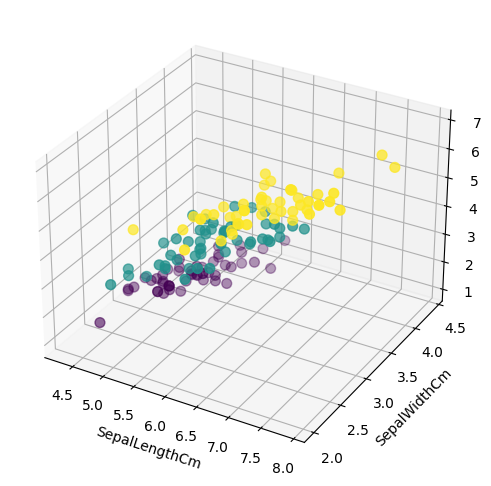

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
# Ajuste os índices conforme necessário
ax.scatter(df2[columns[0]], df2[columns[1]], df2[columns[2]], c=df2['Class'], cmap='viridis', s=50)
ax.set_xlabel(columns[0])
ax.set_ylabel(columns[1])
ax.set_zlabel(columns[2])
plt.show()

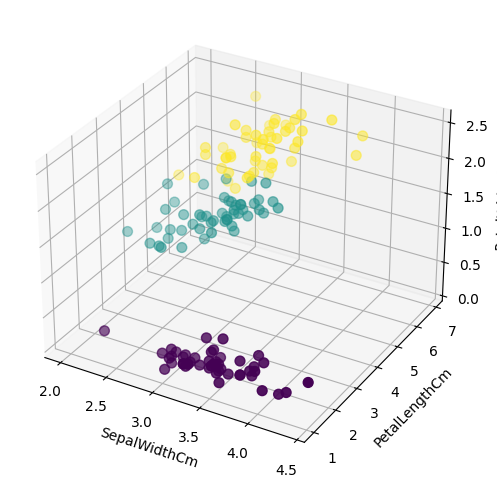

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
# Ajuste os índices conforme necessário
ax.scatter(df2[columns[1]], df2[columns[2]], df2[columns[3]], c=df2['Class'], cmap='viridis', s=50)
ax.set_xlabel(columns[1])
ax.set_ylabel(columns[2])
ax.set_zlabel(columns[3])
plt.show()

In [10]:
print("Primeiras 5 linhas de df2[,:-1]:")
print(df2.iloc[:, :-1].head())
print("\nPrimeiras 5 linhas de df2['Class']:")
print(df2['Class'].head())

Primeiras 5 linhas de df2[,:-1]:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

Primeiras 5 linhas de df2['Class']:
0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


In [11]:
# Transformando o target em um array
y = df2['Class'].values

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
np.set_printoptions(precision=1, suppress=True, linewidth=150, threshold=2)
# Configuração da impressão do Numpy Array:
    #  suppress = True: suprime a impressão de notação científica para números muito pequenos ou muito grandes.
    #  linewidth=150: define a largura máxima da linha para a saída.
remove_columns_2 = ['Class']
df3 = df2.drop(columns=remove_columns_2)
df3 = df3.values
df3

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       ...,
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

In [14]:
print(df3.ndim)

2


Podemos utilizar o método .predict() do sklearn para os modelos encontrados pelo algoritmo evolucionário definindo uma classe filha da classe pai KMeans

In [15]:
class KMeansEvol(KMeans):
    def __init__(self, n_clusters=2, init='k-means++', precomputed_centroids=None, **kwargs):
        super().__init__(n_clusters=n_clusters, init=init, **kwargs)
        self.precomputed_centroids = precomputed_centroids # inicializar a variável que recebe os centróides otimizados pelo GA

  #cria um novo fit para não usar o seu centroide e user o centroide do GA
    def fit(self, X, y=None, sample_weight=None):
        self.cluster_centers_ = self.precomputed_centroids
        self._n_threads = 1 # input para self.predict()
        self.labels_ = self.predict(X)  # Prever partições de cada amostra
        return self



Criar código do GA:

1. função para inicialização da pop
2. função de fitness
3. função de seleção
4. função de crossover
5. função de mutação
6. loop geral

In [16]:
#centroides =  numero de clusters = (x,y)
#avalisa o melhore centroide de acordo com a fitness

## **Função para inicialização da População**

In [17]:
# Função que gera centróides aleatoriamente.

def init_pop(P, n_f, n_c, X):
    """
    Inicialize P indivíduos da população. Cada indivíduo contém n_c centróides.

    Parâmetros:
    P: Número de indivíduos na população
    n_c: Número de centróides em cada indivídio
    n_f: Número de características no conjunto de dados
    X: Conjunto de dados
    """
    pop = []
    for _ in range(P):                            # loop em todos os indivíduos
        centroids = []                            # Inicializar indivíduo
        for __ in range(n_c):                     # loop em cada centródide do indivíduo
          centroid = []
          for feature_index in range(n_f):        # loop em cada feature
              # Gerar a coordenada do centróide associada à feature
              coordinate_f = np.random.uniform(np.min(X[:, feature_index]), np.max(X[:, feature_index]))
              centroid.append(coordinate_f)
          centroids.extend(centroid)              # adicionar centróide ao indivíduo  [x_1 y_1 x_2 y_2]
        pop.append(np.array(centroids))           # adicionar indivíduo na pop
    return pop                                    # Retorna a população inicial com P indivíduos

Vamos simular a geração de 3 indivíduos com 2 centróides cada

In [18]:
X = df3                 # Dados
n_clst = 3              # Nº de clusters
n_clusters = n_clst

pop = init_pop(3, X.ndim, n_clusters, X)
for index, value in enumerate(pop):
    print(f"ind: {index}, Value: {value}\n")

ind: 0, Value: [6.5 2.1 4.6 2.1 5.4 2.4]

ind: 1, Value: [6.  3.  5.5 3.  7.2 2.6]

ind: 2, Value: [5.1 2.8 5.3 2.3 6.  2.8]



Definição da função que calcula a fitness do indivíduo: Silhouette Score

A Silhouette é uma métrica de avaliação comum em tarefas de clustering, como o k-means, que mede o quão bem os objetos estão agrupados. Essa métrica fornece uma pontuação para cada ponto de dados, indicando quão semelhante ele é ao seu próprio cluster (coesão) em comparação com outros clusters (separação).

A pontuação Silhouette ($S$) para um ponto de dados específico é calculada usando as seguintes fórmulas:

1. **Distância Média Dentro do Cluster ($a_i$):**
   Representa a medida de coesão para o ponto $i$. É a média das distâncias euclidianas entre $i$ e os outros pontos no mesmo cluster $C_i$.

   $ a_i = \frac{1}{|C_i| - 1} \sum_{j \in C_i, i \neq j} d(i, j) $

2. **Distância Média para o Cluster Mais Próximo ($b_i$):**
   Representa a medida de separação para o ponto $i$. É a média das distâncias euclidianas entre $i$ e todos os pontos no cluster mais próximo diferente de $C_i$.

   - $b_i = \min_{k \neq i} \frac{1}{|C_k|} \sum_{j \in C_k} d(i, j)$

3. **Silhouette para o Ponto \(i\):**
   A pontuação Silhouette para o ponto $i$ é então calculada como a diferença entre $b_i$ e $a_i$, dividida pelo máximo entre $a_i$ e $b_i$.

   $S_i = \frac{b_i - a_i}{\max\{a_i, b_i\}}$

A pontuação Silhouette para todo o conjunto de dados é a média das pontuações individuais para cada ponto.

Essa métrica produz valores no intervalo [-1, 1], onde valores próximos de 1 indicam que os pontos estão bem ajustados ao seu cluster, valores próximos de -1 indicam que os pontos podem ter sido atribuídos ao cluster errado, e valores próximos de 0 indicam sobreposição ou que os pontos podem estar em uma região de transição entre dois clusters.


In [19]:
def fitness_function(ind, n_clusters, X):

    # Assumindo que o conjunto de centróides de um indivíduo é representado por:
    #np.array([[x1_(1) x1_(2) x1_(3) ... x1_(n_f)] ... [x(n_c)_(1) x(n_c)_(2) x(n_c)_(3) ... x(n_c)_(n_f)] ])
    # onde: n_f-> número de características, n_c-> número de clusters
    # transformar em um array com dimensões (n_clusters x n_f)
    ind_ready = np.reshape(ind, (n_clusters, X.ndim))

    # Criar instância do KMeansEvol
    kmeans_ga = KMeansEvol(n_clusters=n_clusters, precomputed_centroids=ind_ready)
    kmeans_ga.fit(X)

    # Calcular a métrica silhouette como a fitness do indivíduo
    labels = kmeans_ga.labels_
    if all(x == labels[0] for x in labels): # se somente um cluster existir
      silhouette_avg = -1 #maximiza a silhuete
    else:
      silhouette_avg = silhouette_score(X, labels)


    # Estamos maximizando a silhouette, então retorne o valor multiplicado por (-1)
    return -silhouette_avg, kmeans_ga

Avaliar indivíduos gerados anteriormente

score: -0.1565634991358336


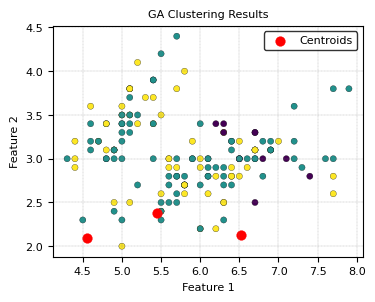

score: -0.04647787382579658


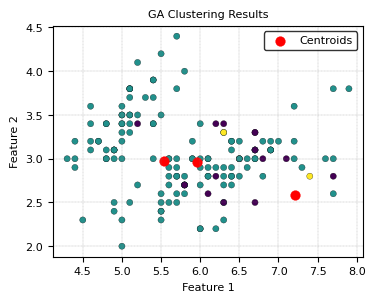

score: -0.0776441701341595


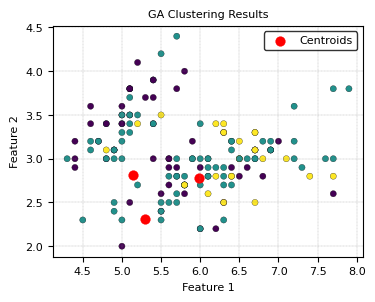

In [20]:
# avaliar os indivíduos
for ind in pop:
  score, kmeans = fitness_function(ind, n_clusters, X)
  labels = kmeans.labels_
  print("score: " + str(-score))
  # Visualizar indivíduo
  plt.figure(figsize=(4, 3))
  plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=20, linewidths=0.2)
  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=50, color='red', label='Centroids', linewidths=0.2)
  plt.title('GA Clustering Results', fontsize=8)
  plt.xlabel('Feature 1', fontsize = 8)
  plt.ylabel('Feature 2', fontsize = 8)
  plt.tick_params(axis='x', labelsize =8)
  plt.tick_params(axis='y', labelsize =8)
  plt.legend()
  plt.grid(color='gray', linestyle='--', linewidth=0.2)
  plt.legend(fontsize = 8, edgecolor = 'k')
  plt.show()

Função de seleção de pais

In [21]:
def select_individuals(population):
    """
    Selecione dois indivíduos da população aleatoriamente para P seleções.

    Parâmetros:
    population: Lista ou array representando a população.

    Retorna:
    Lista de tuplas, cada uma contendo os índices de dois indivíduos selecionados aleatoriamente.
    """
    population_size = len(population)
    selections = []

    for _ in range(population_size-1):
        # Selecione dois indivíduos com reposição para gerar uma criança
        selected_indices = np.random.choice(population_size, size=2, replace=True)
        selections.append(tuple(selected_indices))

    return selections

Simulando seleções dos pais

In [22]:
# Vamos simular as seleções de pais
selections = select_individuals(pop)

# Mostrar as seleções
for idx, selected_indices in enumerate(selections):
    print(f"Selection {idx + 1}: {selected_indices}")

Selection 1: (2, 0)
Selection 2: (1, 0)


Função de crossover

In [23]:
def uniform_crossover(parent1, parent2, crossover_rate=0.5):
    """
    Realize o cruzamento uniforme entre dois pais.

    Parâmetros:
    parent1: genes do primeiro pai.
    parent2: genes do segundo pai.
    crossover_rate: Probabilidade de selecionar um gene do parent1

    Retorna:
    genes da criança após o cruzamento uniforme.
    """

    # Gerar uma lista aleatória booleana, onde o elemento da lista é igual a True, se p < crossover_rate
    mask = np.random.rand(len(parent1)) < crossover_rate

    # Realizar crossover
    child = np.where(mask, parent1, parent2)

    return child.tolist()

Vamos avaliar o crossover

In [24]:
# quando vai convergindo as mutacoes serão mais parecidas com os pais, havera menos pertubacoes
parent1, parent2 = pop[selections[0][0]], pop[selections[0][1]]
child = uniform_crossover(parent1, parent2)

print("Parent 1:", parent1)
print("Parent 2:", parent2)
print("Child after Uniform Crossover:", child)

Parent 1: [5.1 2.8 5.3 2.3 6.  2.8]
Parent 2: [6.5 2.1 4.6 2.1 5.4 2.4]
Child after Uniform Crossover: [6.52021193353669, 2.8126043575592075, 4.559992861161567, 2.309409208434817, 5.448717859209042, 2.3845217331937105]


função de mutação

In [25]:
def mutation(child, p_m=0.2, mutation_std_dev=0.1):
    """

    Aplicar mutação aos genes de uma criança.

    Parâmetros:
    child: genes da criança.
    p_m: Probabilidade de aplicar mutação a cada gene.
    mutation_std_dev: Desvio padrão da distribuição normal para a mutação.

    Retorna:
    genes da criança após a mutação.
    """
    mutated_child = np.copy(child)

    # Faça o loop em cada gene e mute-o com probabilidade p_m
    for i in range(len(child)):
        if np.random.rand() < p_m:
            # Aplique a mutação perturbando o gene com uma distribuição normal
            mutated_child[i] += np.random.normal(loc=0, scale=mutation_std_dev)

    return mutated_child.tolist()

Agora vamos aplicar a mutação na criança gerada

In [26]:
p_mutation = 0.6  # Probabilidade de mutação (alta)

# Alicar mutação na criança
mutated_child = mutation(child, p_mutation)
print("Criança original:", child)
print("Criança após mutação:", mutated_child)

Criança original: [6.52021193353669, 2.8126043575592075, 4.559992861161567, 2.309409208434817, 5.448717859209042, 2.3845217331937105]
Criança após mutação: [6.52021193353669, 2.8126043575592075, 4.559992861161567, 2.3932100120440345, 5.143829798237698, 2.4346884764601557]


Definição do loop geral

In [27]:
def genetic_algorithm(pop_size, p_crossover, p_mutation, data, n_clusters, max_generations):
    """
    Loop do algoritmo genético.

    Parâmetros:
    pop_size: Tamanho da população.
    p_crossover: Probabilidade de crossover.
    p_mutation: Probabilidade de mutação.
    X: Conjunto de dados.
    n_clusters: Número de clusters.
    n_features: Número de características.
    max_generations: Número máximo de gerações.

    Retorna:
    Melhor conjunto de centróides obtido pelo algoritmo genético.
    """
    # inicializar os dados
    X = data
    # inicializar pop
    pop = init_pop(pop_size,X.ndim,n_clusters,X)
    # lista para armazenar evolução da fitness
    fitness_over_time_ga = []
    for generation in range(max_generations):
        # avaliar fitness dos indivíduos da pop
        #fitness_values = [fitness_function(ind, n_clusters, X) for ind in pop]
        # selecionar melhor indivíduo com base na fitness
        best_ind_ga = min(pop, key=lambda ind: fitness_function(ind, n_clusters, X)[0])
        # armazenar melhor fitness desta geração
        best_fitness_val, best_kmeans_ga = fitness_function(best_ind_ga, n_clusters, X)
        fitness_over_time_ga.append(-best_fitness_val)

        # Selecionar pais para reprodução
        selections = select_individuals(pop)

        # Criar nova população com crossover e mutação
        offspring = []
        for parent1, parent2 in selections:
            child = uniform_crossover(pop[parent1], pop[parent2], p_crossover)
            child = mutation(child, p_mutation)
            offspring.append(child)
        offspring.append(best_ind_ga)

        # Atualizar população
        pop = offspring

    return best_ind_ga, fitness_over_time_ga

Testando o algoritmo genético na otimização dos centróides do K-means

In [29]:
import time
tempo_inicio = time.time()
# Cada iteração do algoritmo genético é considerada uma nova geração.
# Durante cada geração, os operadores genéticos (seleção, crossover, mutação) são aplicados para criar uma nova população de soluções candidatas.
# O processo é repetido por várias gerações até que um critério de parada seja atingido (como um número fixo de gerações, convergência, etc.).

best_ind_ga, fitness_over_time_ga = genetic_algorithm(pop_size = 50,            # Tamanho da população
                                                      p_crossover = 0.50,       # Probabilidade de crossover
                                                      p_mutation = 0.50,        # Probabilidade de mutação
                                                      data = X,                 # Dados
                                                      n_clusters = n_clst,      # Número de clusters
                                                      max_generations = 25)     # Máximo de gerações
# Cálculo do tempo de execução
tempo_final = time.time()
tempo_GA = (tempo_final - tempo_inicio)/60
print(f"Tempo de execução: {tempo_GA:.2f} minutos")

# Score
best_fitness, best_kmeans_ga = fitness_function(best_ind_ga, n_clusters, X)
score, kmeans = fitness_function(best_ind_ga, n_clusters, X)
labels = kmeans.labels_
print(f"score: {-score:.4f}")

# Analise a evolução da aptidão ao longo do tempo
convergence_threshold = 0.001  # Define um limiar de convergência
converged_iterations = []
fitness_anterior = 0
for iteration in range(1, len(fitness_over_time_ga)):
    fitness_difference = fitness_over_time_ga[iteration - 1] - fitness_over_time_ga[iteration]
    # Verifica se a diferença entre os valores de fitness consecutivos é pequena o suficiente
    if (abs(fitness_difference) < convergence_threshold) & (fitness_difference != fitness_anterior):
        converged_iterations.append(iteration)
    fitness_anterior = fitness_difference
if converged_iterations:  # Se houver iterações de convergência, imprima-as
    print("Convergência alcançada nas gerações:", converged_iterations)
else:
    print("Convergência não alcançada após o número máximo de gerações")


Tempo de execução: 0.18 minutos
score: 0.3613
Convergência alcançada nas gerações: [2, 10]


Tempo de execução: 0.18 minutos
score: 0.3613
Convergência alcançada nas gerações: [2, 10]


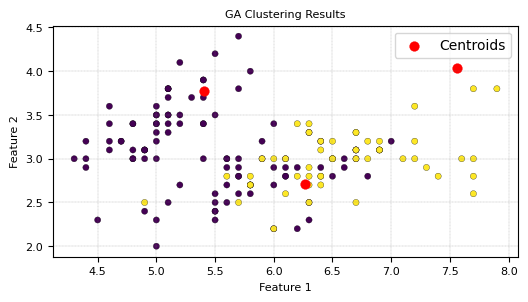

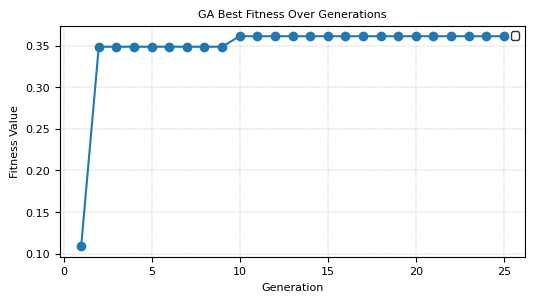

In [30]:

print(f"Tempo de execução: {tempo_GA:.2f} minutos")
print(f"score: {-score:.4f}")
print("Convergência alcançada nas gerações:", converged_iterations)

# Plotar a partição
plt.figure(figsize=(6,3))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=20, linewidths=0.2)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=50, color='red', label='Centroids', linewidths=0.2)
plt.title('GA Clustering Results', fontsize = 8)
plt.xlabel('Feature 1', fontsize = 8)
plt.ylabel('Feature 2', fontsize = 8)
plt.tick_params(axis='x', labelsize =8)
plt.tick_params(axis='y', labelsize =8)
plt.grid(color='gray', linestyle='--', linewidth=0.2)
plt.legend()
plt.show()

# Plotar a evolução da fitness ao longo das gerações
plt.figure(figsize=(6,3))
plt.plot(range(1, len(fitness_over_time_ga) + 1), fitness_over_time_ga, marker='o')
plt.title('GA Best Fitness Over Generations', fontsize = 8)
plt.xlabel('Generation', fontsize = 8)
plt.ylabel('Fitness Value', fontsize = 8)
plt.tick_params(axis='x', labelsize =8)
plt.tick_params(axis='y', labelsize =8)
plt.legend(fontsize = 8, edgecolor = 'k')
plt.grid(color='gray', linestyle='--', linewidth=0.2)
plt.show()

## Resolvendo com PSO

Definir função que gera o enxame inicial

In [ ]:
def init_swarm(P,n_f,n_c, X):
    """
    Inicialize P indivíduos da população. Cada indivíduo contém n_c
    centróides.

    Parâmetros:
    P: Número de partículas no enxame
    n_c: Número de centróides em cada grupo
    n_f: Número de características no conjunto de dados
    X: Conjunto de dados

    Retorna:
    pos = posição inicial das P partículas do enxame
    vel = velocidade inicial das P partículas do enxame
    pos_best = vetor de melhores posições conhecidas pela partícula
    """
    pos = []
    vel = []
    pos_best = []
    # loop em todas as partículas
    for _ in range(P):
        # Inicializar posição da partícula
        centroids = []
        # loop em cada centródide da partícula
        for __ in range(n_c):
          # loop em cada feature
          centroid = []
          for feature_index in range(n_f):
              # Gerar a coordenada do centróide associada à feature
              coordinate_f = np.random.uniform(np.min(X[:, feature_index]), np.max(X[:, feature_index]))
              centroid.append(coordinate_f)
          # adicionar centróide à partícula
          centroids.extend(centroid)
        # adicionar posicao inicial da partícula (grupo de centróides)
        pos.append(np.array(centroids))
        pos_best.append(np.array(centroids))
        # adicionar velocidade inicial da partícula
        vel.append(np.random.uniform(-1,1, size = (n_f*n_c)))


    return pos, vel, pos_best

Vamos simular a geração de 3 indivíduos com 3 centróides cada

In [ ]:
n_clusters = n_clst
pos_swarm, vel_swarm, pos_best = init_swarm(3,X.ndim,n_clusters,X)
for index, value in enumerate(pos_swarm):
    print(f"ind: {index}, Pos: {value}, Vel: {vel_swarm[index]}\n")

ind: 0, Pos: [6.3 2.3 6.  4.3 7.8 3.3], Vel: [ 0.9 -0.5  0.2  0.9 -0.   0.4]

ind: 1, Pos: [5.2 4.1 4.8 3.4 5.1 3.8], Vel: [ 0.9 -0.2 -0.2 -0.2 -0.5 -0.5]

ind: 2, Pos: [7.2 4.3 7.6 3.3 5.4 4.2], Vel: [ 0.2  0.5  0.  -0.7  0.4 -0.7]



Avaliar os três indivíduos

score: -0.24


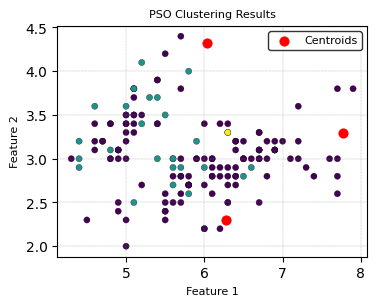

score: -0.17


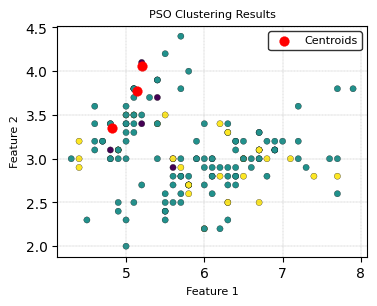

score: 0.02


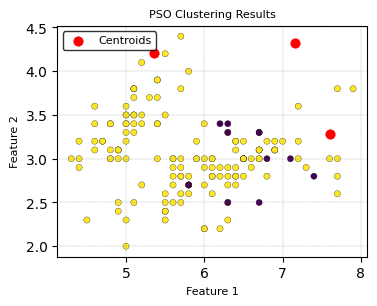

In [ ]:
# avaliar os indivíduos
for ind in pos_swarm:
  score, kmeans = fitness_function(ind, n_clusters, X)
  labels = kmeans.labels_
  print(f"score: {-score:.2f}")

  # Visualizar indivíduo
  plt.figure(figsize=(4,3))
  plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=20, linewidths=0.2)
  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=50, color='red', label='Centroids', linewidths=0.2)
  plt.title('PSO Clustering Results', fontsize=8)
  plt.xlabel('Feature 1', fontsize=8)
  plt.ylabel('Feature 2', fontsize=8)
  plt.grid(color='gray', linestyle='--', linewidth=0.2)
  plt.legend(fontsize = 8, edgecolor = 'k')
  plt.show()




Definir função que atualiza a velocidade das partículas

In [ ]:
# atualizar velocidade da partícula
def update_velocity(pos, vel, pos_best, global_best, w, c1, c2):
  '''
    Atualiza a velocidade da partícula usando a fórmula da Otimização por Enxame de Partículas (PSO).

    Parâmetros:
    pos: posição atual da partícula
    vel: velocidade atual da partícula
    pos_best: Melhor posição conhecida por cada partícula
    global_best: Melhor posição global entre todas as partículas
    c1: Parâmetro cognitivo.
    c2: Parâmetro social.
    w: Peso de inércia.

    Retorna:
    - Velocidade atualizada para a partícula.
  '''
  # inicializar vel atualizada
  vel_updated = []
  # loop em cada posição i da partícula
  for i in range(len(pos)):
      # Gera números aleatórios no intervalo [0, 1]
      r1 = np.random.uniform(0,1) #cognitivo
      r2 = np.random.uniform(0,1) #social

      # Calcula os componentes cognitivo e social da atualização de velocidade
      vel_cognitive = c1 * r1 * (pos_best[i] - pos[i])
      vel_social = c2 * r2 * (global_best[i] - pos[i])

      # Atualiza a velocidade i usando a fórmula do PSO
      vel_updated.append(w * vel[i] + vel_cognitive + vel_social)

  # Retorna a velocidade atualizada para a partícula
  return np.array(vel_updated)

Atualizar a velocidade das partículas do enxame

In [ ]:
# selecionar melhor indivíduo com base na fitness
best_ind_pso = min(pos_swarm, key=lambda ind: fitness_function(ind, n_clusters, X)[0])

# atualizar
vel_before = vel_swarm.copy()
for j in range(3):
  vel_swarm[j] = update_velocity(pos_swarm[j], vel_swarm[j], pos_best[j], best_ind_pso, w=0.5, c1=1, c2=2)

for j, value in enumerate(pos_swarm):
    print(f"ind: {j}, Pos: {value}, \n Vel_updated: {vel_swarm[j]}\nVel_before: {vel_before[j]}")

ind: 0, Pos: [6.3 2.3 6.  4.3 7.8 3.3], 
 Vel_updated: [ 1.1  2.5  0.2 -0.  -0.1  0.4]
Vel_before: [ 0.9 -0.5  0.2  0.9 -0.   0.4]
ind: 1, Pos: [5.2 4.1 4.8 3.4 5.1 3.8], 
 Vel_updated: [ 0.9 -0.1  4.1 -0.1 -0.3  0.2]
Vel_before: [ 0.9 -0.2 -0.2 -0.2 -0.5 -0.5]
ind: 2, Pos: [7.2 4.3 7.6 3.3 5.4 4.2], 
 Vel_updated: [ 0.1  0.3  0.  -0.4  0.2 -0.3]
Vel_before: [ 0.2  0.5  0.  -0.7  0.4 -0.7]


Definir função que atualiza a posição

In [ ]:
# definir função de atualização da posição
def update_position(pos, vel, bounds):
  '''
    Atualiza a posição da partícula a partir da nova velocidade.

    Parâmetros:
    pos: posição atual da partícula
    vel: velocidade atualizada da partícula
    bounds: limites do ambiente

    Retorna:
    - Velocidade atualizada para a partícula.
  '''
  pos_updated = []
  for i in range(len(pos)):
      pos_updated.append(np.clip(pos[i]+vel[i], a_min=bounds[0], a_max=bounds[1]))
  return pos_updated

Atualizar posição dos indivíduos

In [ ]:
# atualizar posição
pos_before = pos_swarm.copy()
for j in range(3):
  pos_swarm[j] = update_position(pos_swarm[j], vel_swarm[j], [-1000,1000])

for j, value in enumerate(pos_swarm):
    print(f"ind: {j}, Pos_updated: {value}, \n Vel_updated: {vel_swarm[j]}\npos_before: {pos_before[j]}")

ind: 0, Pos_updated: [7.331115141124229, 4.84556276511141, 6.261594161233756, 4.313667519136367, 7.647823633146719, 3.658714578919169], 
 Vel_updated: [ 1.1  2.5  0.2 -0.  -0.1  0.4]
pos_before: [6.3 2.3 6.  4.3 7.8 3.3]
ind: 1, Pos_updated: [6.080184566991571, 3.976310245532122, 8.95464574700025, 3.224564313854886, 4.8846498545670745, 3.9301835500790343], 
 Vel_updated: [ 0.9 -0.1  4.1 -0.1 -0.3  0.2]
pos_before: [5.2 4.1 4.8 3.4 5.1 3.8]
ind: 2, Pos_updated: [7.236522407706917, 4.597780813860862, 7.611893176580992, 2.907778915215652, 5.550240812509292, 3.86350021754286], 
 Vel_updated: [ 0.1  0.3  0.  -0.4  0.2 -0.3]
pos_before: [7.2 4.3 7.6 3.3 5.4 4.2]


Definir loop geral

In [ ]:
def pso(swarm_size, c1, c2, w, data, n_clusters, max_iters):
  """
  Loop do PSO.

  Parâmetros:
  swarm_size: num de partículas.
  c1: Parâmetro cognitivo.
  c2: Parâmetro social.
  w: Peso de inércia.
  X: Conjunto de dados.
  n_clusters: Número de clusters.
  n_features: Número de características.
  max_iters: Número máximo de períodos.

  Retorna:
  Melhor conjunto de centróides obtido pelo algoritmo genético.
  """
  # inicializar os dados
  X = data
  bounds = [np.min(X), np.max(X)] # valor mínimo e máximo global de X
  # inicializar o enxame (inicializa as posições, velocidades e melhores posições conhecidas das partículas do enxame)
  pos_swarm, vel_swarm, pos_best_swarm = init_swarm(swarm_size,X.ndim,n_clusters,X)
  fitness_over_time_pso = []  # lista para armazenar evolução da fitness

  # comece o loop
  best_ind_pso = pos_swarm[0] # initialize global best
  for iter in range(max_iters):
      # avaliar fitness das partículas do enxame
      global_best_fitness, _ = fitness_function(best_ind_pso, n_clusters, X) # fitness da melhor posição global


      for j,ind in enumerate(pos_swarm):
        score, _ = fitness_function(ind, n_clusters, X) # fitness da posição atual
        score_known_best, _ = fitness_function(pos_best_swarm[j], n_clusters, X) # fitness da melhor posição conhecida
        if score < score_known_best:
          pos_best_swarm[j] = ind # se uma posição melhor for encontrada
        if score < global_best_fitness:
          best_ind_pso = ind

      # armazenar melhor fitness deste período
      best_fitness_val, best_kmeans_pso = fitness_function(best_ind_pso, n_clusters, X)
      fitness_over_time_pso.append(-best_fitness_val)

      # cycle through swarm and update velocities and position
      for j in range(swarm_size):
          vel_swarm[j] = update_velocity(pos_swarm[j], vel_swarm[j], pos_best_swarm[j], best_ind_pso, w, c1, c2)
          #pos_swarm[j] = update_position(pos_swarm[j], vel_swarm[j], [-1000,1000])
          pos_swarm[j] = update_position(pos_swarm[j], vel_swarm[j], bounds)

  return best_ind_pso, fitness_over_time_pso  # Retorna a melhor posição encontrada pelo PSO (best_ind_pso) e uma lista que registra a evolução da aptidão ao longo das iterações

Testando o enxame de partículas na otimização dos centróides do K-means

In [ ]:
# Em algoritmos de enxame, o termo "iteração" é frequentemente usado para representar a iteração ou passo do algoritmo.
# Durante cada iteração, as abelhas (soluções candidatas) exploram o espaço de busca e compartilham informações sobre a qualidade das soluções.
# O processo é repetido por várias iterações até que um critério de parada seja atingido.
import time

In [ ]:
tempo_inicio = time.time()
best_ind_pso, fitness_over_time_pso = pso(swarm_size = 15,  # número de partículas
                              c1=1.50,                       # parâmetro cognitivo (influência da melhor posição individual (cognitiva) de uma partícula na atualização da velocidade)
                              c2=1.50,                       # parâmetro social (influência da melhor posição global (social) na atualização da velocidade)
                              w= 0.65,                      # peso de inércia (influência da velocidade anterior de uma partícula na atualização da velocidade durante uma iteração)
                              data = X,                     # dados
                              n_clusters = n_clst,          # número de clusters
                              max_iters = 250)              # máximo de iterações
# Cálculo do tempo de execução
tempo_final = time.time()
tempo_PSO = (tempo_final - tempo_inicio)/60
print(f"Tempo de execução: {tempo_PSO:.2f} minutos")
best_fitness, best_kmeans_pso = fitness_function(best_ind_pso, n_clusters, X)
score, kmeans = fitness_function(best_ind_pso, n_clusters, X)
labels = kmeans.labels_
print(f"score: {-score:.4f}")

# Analise a evolução da aptidão ao longo do tempo
convergence_threshold = 0.001  # Define um limiar de convergência
converged_iterations = []
fitness_anterior = 0
for iteration in range(1, len(fitness_over_time_pso)):
    fitness_difference = fitness_over_time_pso[iteration - 1] - fitness_over_time_pso[iteration]
    # Verifica se a diferença entre os valores de fitness consecutivos é pequena o suficiente
    if (abs(fitness_difference) < convergence_threshold) & (fitness_difference != fitness_anterior):
        converged_iterations.append(iteration)
    fitness_anterior = fitness_difference
if converged_iterations:  # Se houver iterações de convergência, imprima-as
    print("Convergência alcançada nas iterações:", converged_iterations)
else:
    print("Convergência não alcançada após o número máximo de iterações")

Tempo de execução: 0.48 minutos
score: 0.3613
Convergência alcançada nas iterações: [6, 13, 17]


Tempo de execução: 0.48 minutos
score: 0.36
Convergência alcançada nas iterações: [6, 13, 17]


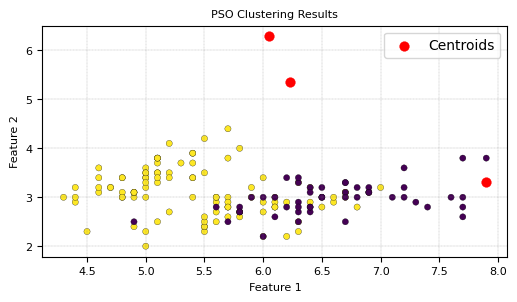

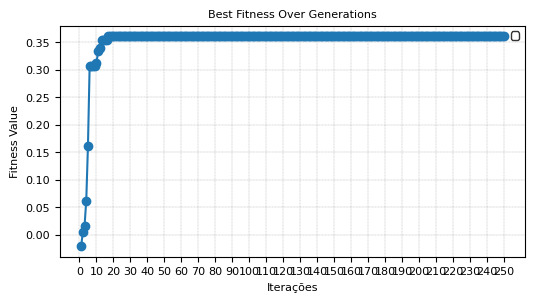

In [ ]:
print(f"Tempo de execução: {tempo_PSO:.2f} minutos")
print(f"score: {-score:.2f}")
print("Convergência alcançada nas iterações:", converged_iterations)

# Plotar a partição
plt.figure(figsize=(6, 3))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=20, linewidths=0.2)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=50, color='red', label='Centroids', linewidths=0.2)
plt.title('PSO Clustering Results', fontsize=8)
plt.xlabel('Feature 1', fontsize=8)
plt.ylabel('Feature 2', fontsize=8)
plt.tick_params(axis='x', labelsize =8)
plt.tick_params(axis='y', labelsize =8)
plt.grid(color='gray', linestyle='--', linewidth=0.2)
plt.legend(fontsize = 8, edgecolor = 'k')
plt.legend()
plt.show()

# Plotar a evolução da fitness ao longo das gerações
plt.figure(figsize=(6, 3))
plt.plot(range(1, len(fitness_over_time_pso) + 1), fitness_over_time_pso, marker='o')
plt.title('Best Fitness Over Generations', fontsize=8)
plt.xlabel('Iterações', fontsize=8)
plt.ylabel('Fitness Value', fontsize=8)
plt.tick_params(axis='x', labelsize =8)
plt.tick_params(axis='y', labelsize =8)
plt.xticks(np.arange(0, len(fitness_over_time_pso)+1, 10))
plt.grid(color='gray', linestyle='--', linewidth=0.2)
plt.legend(fontsize = 8, edgecolor = 'k')
plt.show()

1 0.10751529820751678 -0.04137235341588741
2 0.1786575486686292 -0.07114225046111243
3 0.30390422009630613 -0.12524667142767693
4 0.33722594526704297 -0.03332172517073684
5 0.3536408092567303 -0.016414863989687334
6 0.3536408092567303 0.0
7 0.3536408092567303 0.0
8 0.3612585608233253 -0.007617751566594999
9 0.3612585608233253 0.0
10 0.3612585608233253 0.0
11 0.3612585608233253 0.0
12 0.3612585608233253 0.0
13 0.3612585608233253 0.0
14 0.3612585608233253 0.0
15 0.3612585608233253 0.0
16 0.3612585608233253 0.0
17 0.3612585608233253 0.0
18 0.3612585608233253 0.0
19 0.3612585608233253 0.0
20 0.3612585608233253 0.0
21 0.3612585608233253 0.0
22 0.3612585608233253 0.0
23 0.3612585608233253 0.0
24 0.3612585608233253 0.0
25 0.3612585608233253 0.0
26 0.3612585608233253 0.0
27 0.3612585608233253 0.0
28 0.3612585608233253 0.0
29 0.3612585608233253 0.0
30 0.3612585608233253 0.0
31 0.3612585608233253 0.0
32 0.3612585608233253 0.0
33 0.3612585608233253 0.0
34 0.3612585608233253 0.0
35 0.3612585608233

###Atividade:
Escolher pelo menos três conjuntos de dados do sklearn (ou outra fonte) ou conjunto de dados sintéticos e avaliar a performance do Kmeans gerado pelo GA e PSO contra a performance do Kmeans com o algoritmo de Lloyd (padrão do sklearn). Considere um número igual de gerações para o PSO e para o GA. Se possível plotar um gráfico:

- uma linha constante representando o valor da métrica al baseline (algoritmo de Lloyd)
- uma linha mostrando a evolução da performance do GA ao longo das gerações
- uma linha mostrando a evolução da performance do PSO ao longo das gerações

Tente avaliar como a performance dos algoritmos evolucionários é afetada com diferentes valores dos hiperparâmetros. Se possível, avaliar como o tempo de otimização dos algoritmos evolucionários aumenta a medida que o número de características e amostras aumenta (dica: utilizar o gerador de datasets).

#kMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Tempo de execução: 0.00 minutos
Labels: [1 1 1 ... 2 2 0]
Centroids: [[5.9 2.7 4.4 1.4]
 [5.  3.4 1.5 0.2]
 [6.8 3.1 5.7 2.1]]


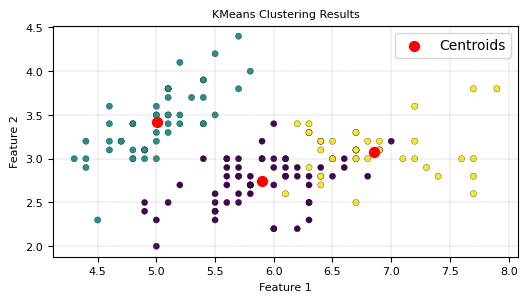

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

kmeans = KMeans(n_clusters=n_clst, random_state=42)

tempo_inicio_SKL = time.time()
# Ajustar o modelo aos dados
kmeans.fit(X)
tempo_final_SKL = time.time()
tempo_SKL = (tempo_final_SKL - tempo_inicio_SKL)/60
print(f"\nTempo de execução: {tempo_SKL:.2f} minutos")

# Obter rótulos de cluster e centróides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Imprimir rótulos e centróides
print("Labels:", labels)
print("Centroids:", centroids)

# Plotar os clusters
plt.figure(figsize = (6,3))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=20, linewidths = 0.2)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=50, color='red', label='Centroids')
plt.title('KMeans Clustering Results', fontsize=8)
plt.xlabel('Feature 1', fontsize=8)
plt.ylabel('Feature 2', fontsize=8)
plt.tick_params(axis='x', labelsize =8)
plt.tick_params(axis='y', labelsize =8)
plt.grid(color='gray', linestyle='--', linewidth=0.2)
plt.legend(fontsize = 8, edgecolor = 'k')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

kmeans.fit(X)
labels = kmeans.labels_

# Calcular o Silhouette Score
silhouette_avg = silhouette_score(X, labels)

print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.5525919445499757


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


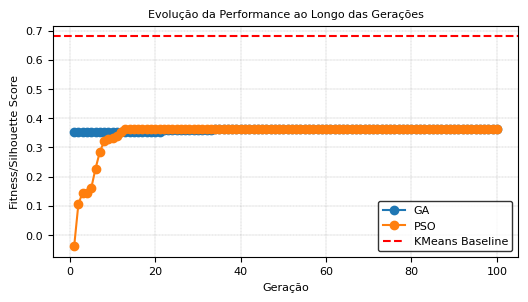

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

baseline_kmeans = KMeans(n_clusters=2, random_state=42)
baseline_kmeans.fit(X)
baseline_labels = baseline_kmeans.labels_
baseline_silhouette = silhouette_score(X, baseline_labels)

plt.figure(figsize = (6,3))
plt.plot(range(1, len(fitness_over_time_ga) + 1), fitness_over_time_ga, label='GA', marker='o')
plt.plot(range(1, len(fitness_over_time_pso) + 1), fitness_over_time_pso, label='PSO', marker='o')
plt.axhline(y=baseline_silhouette, color='r', linestyle='--', label='KMeans Baseline')

plt.title('Evolução da Performance ao Longo das Gerações', fontsize=8)
plt.xlabel('Geração', fontsize=8)
plt.ylabel('Fitness/Silhouette Score', fontsize=8)
plt.tick_params(axis='x', labelsize =8)
plt.tick_params(axis='y', labelsize =8)
plt.grid(color='gray', linestyle='--', linewidth=0.2)
plt.legend(fontsize = 8, edgecolor = 'k')
plt.show()


In [ ]:
print(f"Tempo de execução GA: {tempo_GA:.2f} minutos")
print(f"Tempo de execução PSO: {tempo_PSO:.2f} minutos")
print(f"Tempo de execução Lloyd: {tempo_SKL:.2f} minutos")

Tempo de execução GA: 0.65 minutos
Tempo de execução PSO: 0.80 minutos
Tempo de execução Lloyd: 0.00 minutos



Valor de Convergência Kmeans: 0.5525

Tempo de execução:
- GA: 17s
- PSO: 38s

Desempenho Inicial:
- GA: ~0.25
- PSO: ~0.1

Desempenho Final:
- GA: 0.3612585608233253
- PSO: 0.3612585608233253

Interpretação:

- O PSO e GA alcançaram um desempenho final semelhante.

- O GA atingiu a convergência mais rápido.

- O GA inicialmente tem um desempenho melhor com base na métrica Silhouette Score.

- Ambos os algoritmos atingiram uma solução comparável em termos de qualidade ao serem comparados entre si.